# DECISION TREE REGRESSION PROBLEM ON 50_STARTUPS

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

## READING DATATSET 50_STARTUPS

In [5]:
import pandas as pd
df = pd.read_csv('50_Startups.csv')
df

,RND,ADMIN,MKT,STATE,PROFIT
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94
5,131876.90,99814.71,362861.36,New York,156991.12
6,134615.46,147198.87,127716.82,California,156122.51
7,130298.13,145530.06,323876.68,Florida,155752.60
8,120542.52,148718.95,311613.29,New York,152211.77
9,123334.88,108679.17,304981.62,California,149759.96


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RND     50 non-null     float64
 1   ADMIN   50 non-null     float64
 2   MKT     50 non-null     float64
 3   STATE   50 non-null     object 
 4   PROFIT  50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


In [7]:
df.isna().sum()

RND       0
ADMIN     0
MKT       0
STATE     0
PROFIT    0
dtype: int64

## PREPROCESSING STEPS ON DATASET

In [8]:
X = df.drop(labels=['PROFIT'],axis=1)
Y = df[['PROFIT']]

In [9]:
X.head()

,RND,ADMIN,MKT,STATE
0,165349.20,136897.80,471784.10,New York
1,162597.70,151377.59,443898.53,California
2,153441.51,101145.55,407934.54,Florida
3,144372.41,118671.85,383199.62,New York
4,142107.34,91391.77,366168.42,Florida


In [10]:
Y.head()

,PROFIT
0,192261.83
1,191792.06
2,191050.39
3,182901.99
4,166187.94


## PIPELINE
### con : Simpleimputer= mean,median; StandardScaler
### cat : Simpleimputer = most frequent ; onehotencoder

In [11]:
cat = list(X.columns[X.dtypes=='object'])
con = list(X.columns[X.dtypes!='object'])

In [12]:
cat

['STATE']

In [13]:
con

['RND', 'ADMIN', 'MKT']

In [14]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer

In [16]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scaler',StandardScaler())])
cat_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='most_frequent')),
                           ('ohe',OneHotEncoder(handle_unknown='ignore'))])
pre = ColumnTransformer([('num',num_pipe,con),
                         ('cat',cat_pipe,cat)])

In [18]:
X_pre = pre.fit_transform(X)
X_pre

array([[ 2.01641149e+00,  5.60752915e-01,  2.15394309e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.95586034e+00,  1.08280658e+00,  1.92360040e+00,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.75436374e+00, -7.28257028e-01,  1.62652767e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.55478369e+00, -9.63646307e-02,  1.42221024e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.50493720e+00, -1.07991935e+00,  1.28152771e+00,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.27980001e+00, -7.76239071e-01,  1.25421046e+00,
         0.00000000e+00,  0.00000000e+00,  1.00000000e+00],
       [ 1.34006641e+00,  9.32147208e-01, -6.88149930e-01,
         1.00000000e+00,  0.00000000e+00,  0.00000000e+00],
       [ 1.24505666e+00,  8.71980011e-01,  9.32185978e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00],
       [ 1.03036886e+00,  9.86952101e-01,  8.308

In [20]:
cols = pre.get_feature_names_out()
cols

array(['num__RND', 'num__ADMIN', 'num__MKT', 'cat__STATE_California',
       'cat__STATE_Florida', 'cat__STATE_New York'], dtype=object)

In [22]:
X_pre = pd.DataFrame(X_pre,columns=cols)
X_pre

,num__RND,num__ADMIN,num__MKT,cat__STATE_California,cat__STATE_Florida,cat__STATE_New York
0,2.016411,0.560753,2.153943,0.0,0.0,1.0
1,1.955860,1.082807,1.923600,1.0,0.0,0.0
2,1.754364,-0.728257,1.626528,0.0,1.0,0.0
3,1.554784,-0.096365,1.422210,0.0,0.0,1.0
4,1.504937,-1.079919,1.281528,0.0,1.0,0.0
5,1.279800,-0.776239,1.254210,0.0,0.0,1.0
6,1.340066,0.932147,-0.688150,1.0,0.0,0.0
7,1.245057,0.871980,0.932186,0.0,1.0,0.0
8,1.030369,0.986952,0.830887,0.0,0.0,1.0
9,1.091819,-0.456640,0.776107,1.0,0.0,0.0


## TRAIN TEST SPLIT

In [23]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=21)

In [24]:
xtrain.shape

(40, 6)

In [25]:
xtest.shape

(10, 6)

## CREATE THE MODEL

In [35]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor(random_state=42)
dtr.fit(xtrain,ytrain)

DecisionTreeRegressor()

In [36]:
dtr.score(xtrain,ytrain)

1.0

In [37]:
dtr.score(xtest,ytest)

0.8971518590944964

## TUNNING THE MODEL

In [44]:
params = {'max_depth': [2,3,4,5,6,7,8],
          'criterion':['squared_error','absoulute_error']}
model=DecisionTreeRegressor(random_state=42)


In [47]:
from sklearn.model_selection import GridSearchCV

gscv = GridSearchCV(model,param_grid=params,cv=5,scoring='neg_mean_squared_error')
gscv.fit(xtrain,ytrain)


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42),
             param_grid={'criterion': ['squared_error', 'absoulute_error'],
                         'max_depth': [2, 3, 4, 5, 6, 7, 8]},
             scoring='neg_mean_squared_error')

In [48]:
gscv.best_score_

-303478226.88922685

In [49]:
gscv.best_params_

{'criterion': 'squared_error', 'max_depth': 3}

In [50]:
best_dtr= gscv.best_estimator_
best_dtr

DecisionTreeRegressor(max_depth=3, random_state=42)

## EVALUATE R2 IN TRAINING AND TESTING

In [51]:
best_dtr.score(xtrain,ytrain)

0.967618471445046

In [52]:
best_dtr.score(xtest,ytest)

0.9127832367721694

## PLOTTING THE BASE MODEL DECISION TREE

In [59]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt



[Text(0.5, 0.875, 'num__RND <= 0.084\nsquared_error = 1544602240.239\nsamples = 40\nvalue = 112617.876'),
 Text(0.25, 0.625, 'num__RND <= -1.385\nsquared_error = 605014601.878\nsamples = 23\nvalue = 85867.168'),
 Text(0.125, 0.375, 'num__RND <= -1.605\nsquared_error = 341360637.411\nsamples = 4\nvalue = 41192.91'),
 Text(0.0625, 0.125, '\n  (...)  \n'),
 Text(0.1875, 0.125, '\n  (...)  \n'),
 Text(0.375, 0.375, 'num__RND <= -0.631\nsquared_error = 151898482.744\nsamples = 19\nvalue = 95272.275'),
 Text(0.3125, 0.125, '\n  (...)  \n'),
 Text(0.4375, 0.125, '\n  (...)  \n'),
 Text(0.75, 0.625, 'num__RND <= 1.423\nsquared_error = 537773367.675\nsamples = 17\nvalue = 148810.009'),
 Text(0.625, 0.375, 'num__RND <= 0.423\nsquared_error = 190730232.827\nsamples = 13\nvalue = 138202.025'),
 Text(0.5625, 0.125, '\n  (...)  \n'),
 Text(0.6875, 0.125, '\n  (...)  \n'),
 Text(0.875, 0.375, 'cat__STATE_Florida <= 0.5\nsquared_error = 111352425.087\nsamples = 4\nvalue = 183285.955'),
 Text(0.8125, 0

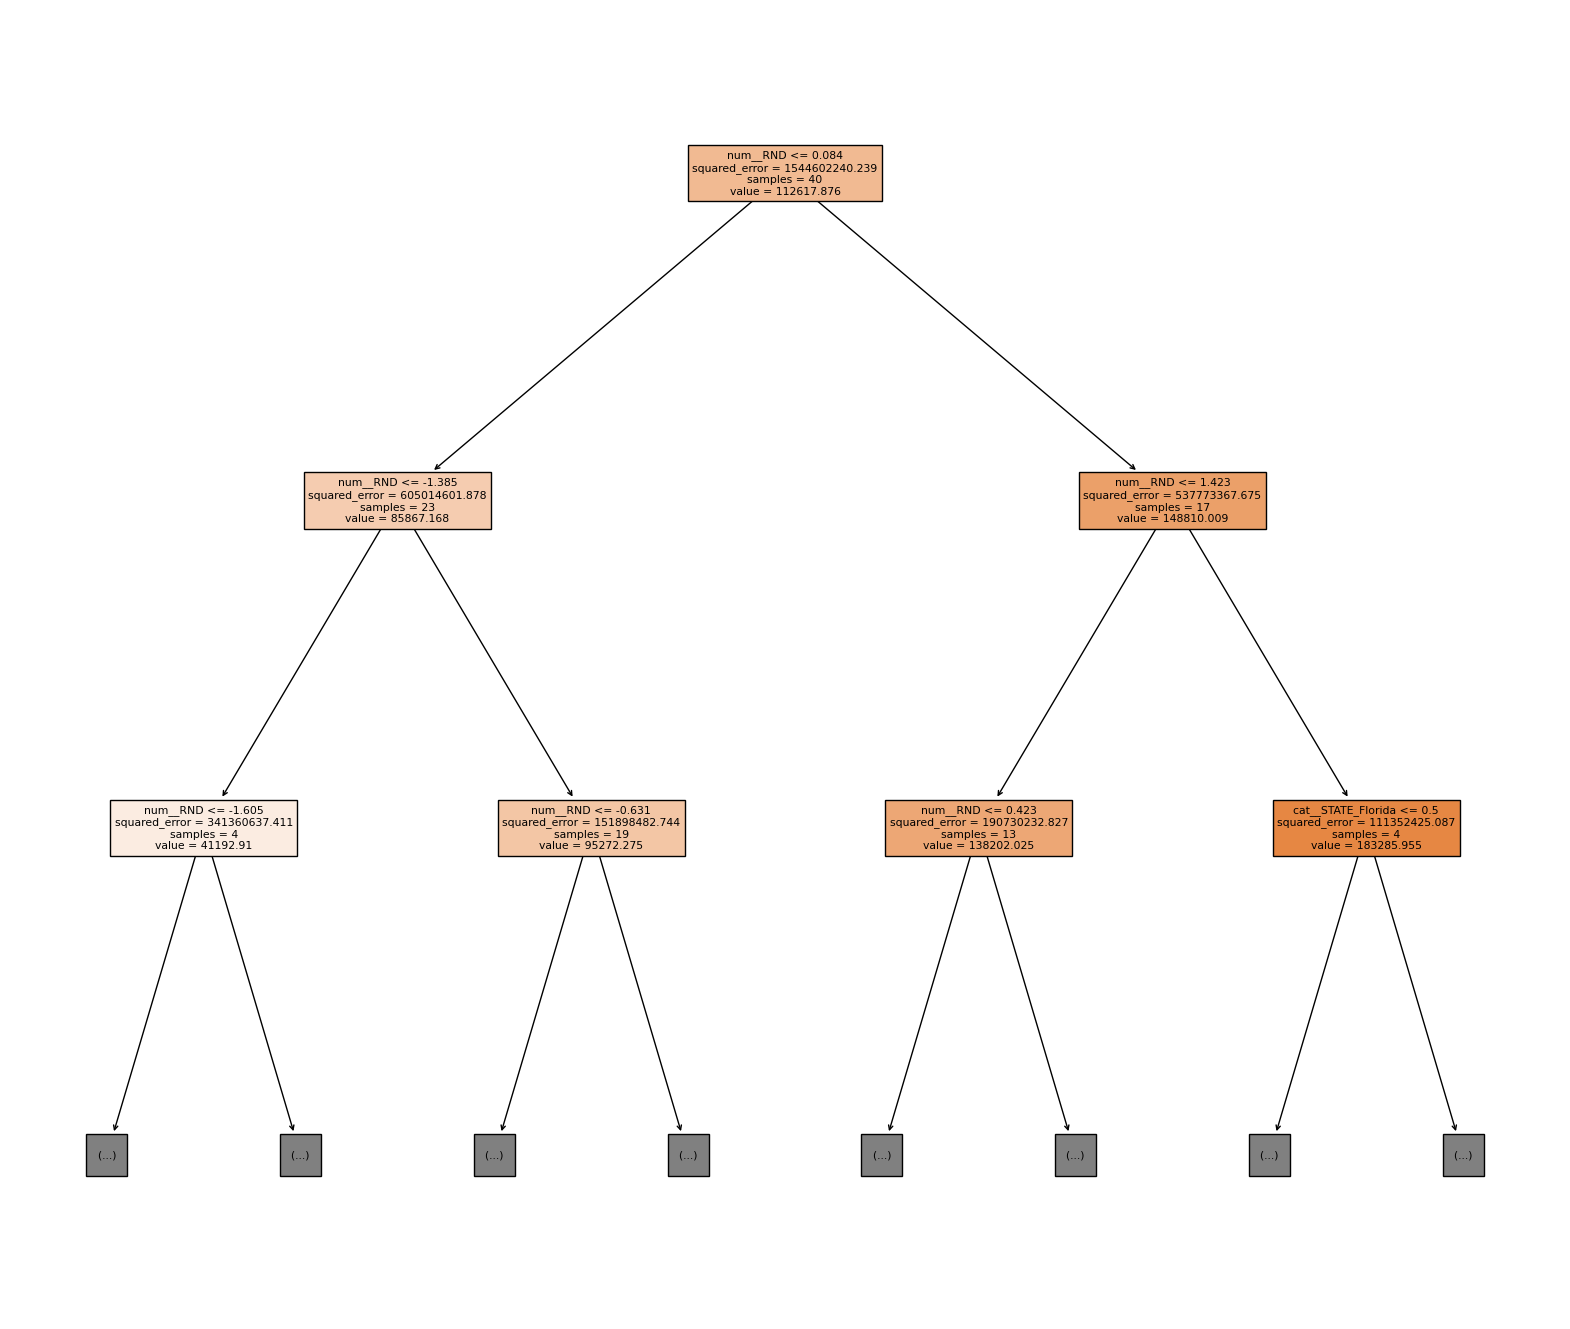

In [60]:
plt.figure(figsize=(20,17))
plot_tree(dtr,filled=True,feature_names=list(xtrain.columns),max_depth=2)

## PREDICTION

In [61]:
ypred_tr = dtr.predict(xtrain)
ypred_ts = dtr.predict(xtest)

## FEATURE IMPORTANCE

In [62]:
imp = dtr.feature_importances_
imp

array([9.77767450e-01, 4.26509227e-04, 7.80120816e-03, 1.58459948e-03,
       6.40185789e-03, 6.01837528e-03])

In [64]:
imp = pd.Series(imp)
imp.index = xtrain.columns
imp

num__RND                 0.977767
num__ADMIN               0.000427
num__MKT                 0.007801
cat__STATE_California    0.001585
cat__STATE_Florida       0.006402
cat__STATE_New York      0.006018
dtype: float64

<Axes: title={'center': 'Feature importance'}>

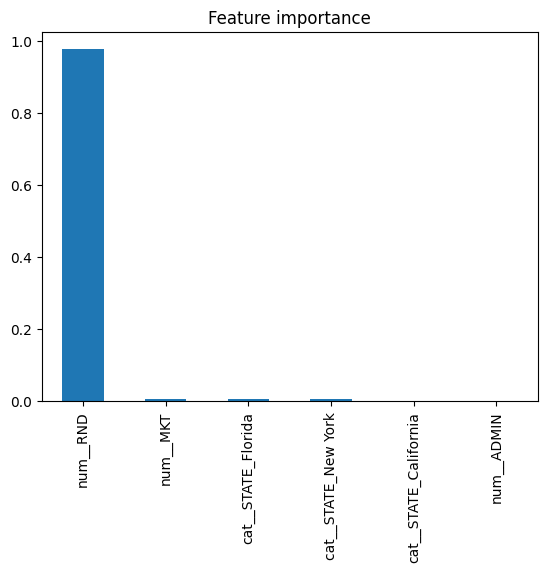

In [65]:
imp = imp.sort_values(ascending=False)
imp.plot(kind='bar',title='Feature importance')

## MEAN SQUARED ERROR , MEAN ABSOLUTE ERROR AND ROOT MEAN SQUARED ERROR

In [67]:
from sklearn.metrics import mean_squared_error, mean_absolute_error,r2_score
mse= mean_squared_error(ytest,ypred_ts)
mse

182529416.07330006

In [68]:
mae= mean_absolute_error(ytest,ypred_ts)
mae

9562.798

In [70]:
rmse= mse**1/2
rmse

91264708.03665003

In [72]:
r2= r2_score(ytest,ypred_ts)
r2

0.8971518590944964